<a href="https://colab.research.google.com/github/FranciscoFoz/Bootcamp-Alura-Data-Science-Aplicado-a-Financas/blob/main/Notebooks/Notebook_1_Limpeza_transformacao_exploracao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= MediumSpringGreen		size = 6> Projeto Módulo 6 -  Data Science aplicado a Finanças </font>

 # <font color= MediumSpringGreen		size = 5> Modelo de machine learning na aprovação de crédito financeiro </font>

Elaborado por [Francisco Foz](https://www.linkedin.com/in/francisco-tadeu-foz/)

Notebook 1

## <font color= MediumSpringGreen> Introdução

Olá! 

Neste repositório você encontrará o meu projeto do módulo extra do Bootcamp Data Science 2021-22 da [Alura](https://www.alura.com.br/).

Durante todo o Bootcamp tive a oportunidade de mergulhar no oceano da Ciência de Dados a partir de dados reais em 6 módulos.

___ 

## <font color= MediumSpringGreen> Projeto

### <font color= MediumSpringGreen> Objetivo

Desenvolver uma aplicação, com um modelo de machine learning por detrás, que possibilite a avaliação da aprovação de crédito pelo banco fictício "Bytebank".

### <font color= MediumSpringGreen> Contexto

O processo de pedido de crédito se desenvolve nas seguintes etapas:

* Solicitação do cliente ao banco (preenchimento de informações).
* Processamento do modelo de decisão de aprovação (machine learning)
* Envio da aprovação ou negação do pedido.


Para isso será realizado o desenvolvimento do modelo de machine learning a partir de dados históricos fornecidos pelo banco. Serão realizadas as seguintes etapas:

* Limpeza e manipulação dos dados.
* Análise exploratória
* Treino e teste de algoritmos de classificação.

Para o desenvolvimento da aplicação, você poderá conferir os demais arquivos no [repositório](https://github.com/FranciscoFoz/Bootcamp-Alura-Data-Science-Aplicado-a-Financas).

O projeto foi divido em dois notebooks:

1 - Limpeza, transformação e exploração dos dados

2 - Desenvolvimento do modelo 

### <font color= MediumSpringGreen> Bibliotecas utilizadas em todo o projeto

Requirements


* pandas==1.3.5
* numpy==1.21.5
* matplotlib==3.4.2
* seaborn==0.11.2
* scikit-learn==0.23.2
* imbalanced-learn==0.7.0
* scipy==1.4.1
* six==1.16.0
* lazypredict==0.2.7
* scikit-optimize==0.8.1


Importarei as bibliotecas necessárias, configuradas no "requirements.txt" do projeto.

Devido outra versão do matplotlib, será necessário restartar o ambiente após a desisntalação da versão pré instalada no colab.

In [ ]:
!pip install wget
import wget

In [ ]:
wget.download('https://github.com/FranciscoFoz/Bootcamp-Alura-Data-Science-Aplicado-a-Financas/raw/main/requirements.txt', 'requirements.txt')

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=25ae2867bfee613b2b99037fc4903d9da0503ba4362f85554fdec7cf2bb9d864
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


'requirements.txt'

In [ ]:
!pip install -r requirements.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## <font color= MediumSpringGreen> Importação das funções

Importarei o notebook com todas as funções necessárias para o projeto.

In [ ]:
wget.download('https://raw.githubusercontent.com/FranciscoFoz/Bootcamp-Alura-Data-Science-Aplicado-a-Financas/main/Notebooks/funcoes.py', 'funcoes.py')

'funcoes.py'

In [ ]:
import funcoes as f


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## <font color= MediumSpringGreen> Importação de dados

Os dados foram fornecidos pela Alura e estão localizados na pasta "Dados_fornecidos" no [repositório](https://github.com/FranciscoFoz/Bootcamp-Alura-Data-Science-Aplicado-a-Financas) deste projeto.

A partir disso, realizei a importação diretamente para o notebook.

In [ ]:
dados_clientes_cadastrados = pd.read_csv('https://github.com/FranciscoFoz/Bootcamp-Alura-Data-Science-Aplicado-a-Financas/blob/main/Dados_fornecidos/dados_clientes_cadastrados.csv?raw=true')
dados_clientes_aprovados = pd.read_csv('https://github.com/FranciscoFoz/Bootcamp-Alura-Data-Science-Aplicado-a-Financas/blob/main/Dados_fornecidos/dados_clientes_aprovados.csv?raw=true')

## <font color= MediumSpringGreen> 1. Limpeza e exploração inicial dos dados


In [ ]:
dados_clientes_cadastrados

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.00,Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
1,5008805,H,1,1,0,427500.00,Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
2,5008806,H,1,1,0,112500.00,Empregado,Ensino medio,Casado,Casa propria,59.00,1,0,0,0,Seguranca,2.00,3.10
3,5008808,M,0,1,0,270000.00,Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40
4,5008809,M,0,1,0,270000.00,Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,135000.00,Pensionista,Ensino medio,Separado,Casa propria,62.00,1,0,0,0,Outros,1.00,-1000.70
438553,6840222,M,0,0,0,103500.00,Empregado,Ensino medio,Solteiro,Casa propria,44.00,1,0,0,0,Construcao Civil,1.00,8.20
438554,6841878,M,0,0,0,54000.00,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.00,1,1,0,0,Venda,1.00,1.00
438555,6842765,M,0,1,0,72000.00,Pensionista,Ensino medio,Casado,Casa propria,59.00,1,0,0,0,Outros,2.00,-1000.70


Irei verificar se cada linha é única ou se tem valores duplicados.


In [ ]:
dados_clientes_cadastrados.duplicated().sum()                                   #Verificar valores duplicados

0

In [ ]:
dados_clientes_cadastrados.ID_Cliente.value_counts()                            #Contar valores de cada id

7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [ ]:
dados_clientes_cadastrados.ID_Cliente.duplicated(keep=False).sum()              #Somar a quantidade de valores duplicados de ID

94

Não houve valores duplicados das linhas, entretanto tiveram dos IDs em um total de 94.

Para isso, deixarei os id_repetidos dentro de uma variável "id_repetidos".



In [ ]:
id_repetidos = dados_clientes_cadastrados[dados_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']

In [ ]:
dados_clientes_cadastrados[dados_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)].sort_values(by='ID_Cliente',ascending=True)

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,135000.00,Empregado,Ensino medio,Casado,Casa propria,33.00,1,0,0,1,Construcao Civil,5.00,2.00
425023,7022197,M,0,1,0,450000.00,Associado comercial,Ensino superior,Separado,Casa propria,54.00,1,0,0,1,Outros,1.00,4.90
431545,7022327,M,0,1,0,135000.00,Associado comercial,Ensino medio,Solteiro,Casa propria,40.00,1,0,0,0,Alta tecnologia,1.00,14.50
431911,7022327,H,1,1,0,256500.00,Associado comercial,Ensino superior,Casado,Casa propria,59.00,1,0,0,1,Equipe principal,2.00,4.60
425486,7023108,H,1,1,1,67500.00,Empregado,Ensino medio,Casado,Casa propria,42.00,1,1,0,0,Equipe principal,3.00,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,M,0,1,2,292500.00,Empregado,Ensino superior,Casado,Casa propria,38.00,1,0,1,0,Contabilidade,4.00,12.00
421464,7836971,H,1,0,1,157500.00,Empregado,Ensino medio,Casado,Casa propria,38.00,1,0,0,0,Outros,3.00,15.10
428620,7836971,M,0,1,0,103500.00,Empregado,Ensino medio,Uniao estavel,Casa propria,37.00,1,0,1,0,Venda,2.00,7.70
422068,7838075,H,0,1,0,337500.00,Associado comercial,Ensino medio,Casado,Casa propria,50.00,1,0,0,1,Motorista,2.00,3.50


Os ID repetidos, possivelmente são de algum erro na base de dados, pois nenhuma outra informação bate com o seu semelhante. 

Criarei outra variável com o DataFrame sem os valores repetidos, para que possa trabalhar com ela. 

In [ ]:
df_clientes_cadastrados_ID_unicos = dados_clientes_cadastrados.drop(id_repetidos.index)

Verificarei se não há nenhum valor nulo no DataFrame:


In [ ]:
df_clientes_cadastrados_ID_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

Verificarei as informações gerais do conjunto de dados:


In [ ]:
df_clientes_cadastrados_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

### <font color= MediumSpringGreen> 1.1 Exploração inicial das variáveis


#### <font color= MediumSpringGreen> 1.1.1 Variáveis quantitativas

In [ ]:
df_clientes_cadastrados_ID_unicos.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.00,Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
1,5008805,H,1,1,0,427500.00,Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
2,5008806,H,1,1,0,112500.00,Empregado,Ensino medio,Casado,Casa propria,59.00,1,0,0,0,Seguranca,2.00,3.10
3,5008808,M,0,1,0,270000.00,Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40
4,5008809,M,0,1,0,270000.00,Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40


A partir das informações observadas anteriormente, criarei duas variáveis com as colunas quantitativas e as colunas categoricas.

In [ ]:
colunas_quantitativas = ['Idade',
                         'Qtd_Filhos',
                         'Rendimento_Anual',
                         'Anos_empregado',
                         'Tamanho_Familia'
                         ]

colunas_categoricas = ['Genero',
                       'Tem_Carro',
                       'Tem_Casa_Propria',
                       'Categoria_de_renda',
                       'Grau_Escolaridade',
                       'Estado_Civil',
                       'Moradia',
                       'Tem_Celular',
                       'Tem_telefone_trabalho',
                       'Tem_telefone_fixo',
                       'Tem_email',
                       'Ocupacao'
                       ]

Verificarei primeiramente a descrição estatística resumida das colunas quantitativas.

In [ ]:
df_clientes_cadastrados_ID_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.00,438463.00,438463.00,438463.00,438463.00
mean,43.83,0.43,187522.01,-165.94,2.19
std,11.47,0.72,110083.15,380.20,0.90
min,21.00,0.00,26100.00,-1000.70,1.00
25%,34.00,0.00,121500.00,1.00,2.00
50%,43.00,0.00,161100.00,4.00,2.00
75%,53.00,1.00,225000.00,8.50,3.00
max,69.00,19.00,6750000.00,48.00,20.00


Há um valor estranho de -1000  em Anos_empregado. 

Farei uma query para entender quem são os clientes pela sua categoria.

In [ ]:
df_clientes_cadastrados_ID_unicos.query('Anos_empregado <= 0')[['Anos_empregado','Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.70        Pensionista            75314
0.00            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

Essa valor foi atribuído aos Pensionistas. 

Para que possa manter a mesma informação simbolziando que eles não estão trabalahndo, porém não distorça o conjunto de dados, trocarei pelo valor -1. 

In [ ]:
df_clientes_cadastrados_ID_unicos['Anos_empregado'] = df_clientes_cadastrados_ID_unicos['Anos_empregado'].replace(-1000.7,-1)

É possível observar na distribuição dos dados que temos outliers, principalmente em tamanho da família, quantidade de filhos e rendimento anual.

Apenas comparando o 75% com o número máximo.

In [ ]:
df_clientes_cadastrados_ID_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.00,438463.00,438463.00,438463.00,438463.00
mean,43.83,0.43,187522.01,5.78,2.19
std,11.47,0.72,110083.15,6.73,0.90
min,21.00,0.00,26100.00,-1.00,1.00
25%,34.00,0.00,121500.00,1.00,2.00
50%,43.00,0.00,161100.00,4.00,2.00
75%,53.00,1.00,225000.00,8.50,3.00
max,69.00,19.00,6750000.00,48.00,20.00


Não irei tratar eles agora, pois irei prmieiro explorar para entender cada variável, mas ao final passarei pelo tratamento antes de subir par ao treinamento do modelo.

#### <font color= MediumSpringGreen> 1.1.2 Variáveis categóricas

In [ ]:
df_clientes_cadastrados_ID_unicos[colunas_categoricas]

,Genero,Tem_Carro,Tem_Casa_Propria,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao
0,H,1,1,Empregado,Ensino superior,Uniao estavel,Alugado,1,1,0,0,Outros
1,H,1,1,Empregado,Ensino superior,Uniao estavel,Alugado,1,1,0,0,Outros
2,H,1,1,Empregado,Ensino medio,Casado,Casa propria,1,0,0,0,Seguranca
3,M,0,1,Associado comercial,Ensino medio,Solteiro,Casa propria,1,0,1,1,Venda
4,M,0,1,Associado comercial,Ensino medio,Solteiro,Casa propria,1,0,1,1,Venda
...,...,...,...,...,...,...,...,...,...,...,...,...
438552,H,0,1,Pensionista,Ensino medio,Separado,Casa propria,1,0,0,0,Outros
438553,M,0,0,Empregado,Ensino medio,Solteiro,Casa propria,1,0,0,0,Construcao Civil
438554,M,0,0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,1,1,0,0,Venda
438555,M,0,1,Pensionista,Ensino medio,Casado,Casa propria,1,0,0,0,Outros


Ao observar as primeiras linhas das vairáveis categóricas, percebi que aparentemente todos tinham celular. Para isso, fiz uma contagem de valores.

In [ ]:
df_clientes_cadastrados_ID_unicos.Tem_Celular.value_counts()

1    438463
Name: Tem_Celular, dtype: int64

De fato todos os possuíam celular.

Por se tornar uma variável "neutra" no conjunto de dados, irei excluir ela.

Também excluirei a variável de gênero, pois não há nenhuma significância esse ponto para o modelo.


In [ ]:
df_clientes_cadastrados_ID_unicos.drop(['Genero','Tem_Celular'],axis=1,inplace=True)

### <font color= MediumSpringGreen> 1.2 Clientes aprovados




Irei agora realizar a limpeza e exploração inicial na base de dados dos clientes aprovados.

In [ ]:
dados_clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado
...,...,...,...
1048570,5150487,-25,pagamento realizado
1048571,5150487,-26,pagamento realizado
1048572,5150487,-27,pagamento realizado
1048573,5150487,-28,pagamento realizado


Verificarei as informações gerais: 

In [ ]:
dados_clientes_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Verificarei qual é a quantidade total de ID únicos dentro deste DataFrame:

In [ ]:
dados_clientes_aprovados.ID_Cliente.value_counts().shape                        #Total de clientes aprovados

(45985,)

In [ ]:
df_clientes_cadastrados_ID_unicos.shape                                         #Total de clientes cadastrados

(438463, 16)

Com um total de 45985 clientes aprovados é possível entender que dentre o total de clientes cadastrados, apenas estes tiveram crédito aprovado.

Irei verificar alguns clientes para entender melhor os dados.

In [ ]:
dados_clientes_aprovados.query('ID_Cliente == 5001712')                         #Entendendo o ID_Cliente "5001712"

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [ ]:
dados_clientes_aprovados.query('ID_Cliente == 5001711')                         #Entendendo o ID_Cliente "5001711"

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


Listarei todas as opções dentro da Faixa de atraso para saber quais são as opções:

In [ ]:
dados_clientes_aprovados.Faixa_atraso.value_counts().index.to_list()

['pagamento realizado',
 '1-29 dias',
 'nenhum empréstimo',
 '30-59 dias',
 '>150 dias',
 '60-89 dias',
 '90-119 dias',
 '120-149 dias']

#### <font color= MediumSpringGreen> 1.2.1 Desenvolvimento de novas métricas

Afim de se desenvolver análises posteriores, criarei algumas métricas dentro do conjunto de dados de Clientes Aprovados. 

Criarei duas series baseadas de quando o cliente abriu a conta e de quando ela foi finalizada.


In [ ]:
df_registros_creditos_agrupados_ID = dados_clientes_aprovados.groupby('ID_Cliente')           #Agrupei os clientes por ID
ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x['Mes_referencia']))   #Apliquei uma função  que retornará o valor mínimo do mês de referência
ser_abertura.name = 'Abertura'                                                                #Nomeei a serie de "Abertura"
ser_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [ ]:
ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x['Mes_referencia']))    #Apliquei uma função  que retornará o valor máximo do mês de referência
ser_final.name = 'Final'                                                                    #Nomeei a serie com o nome "Final"
ser_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

Com as duas series criadas irei agrupá-las dentro do DataFrame:

In [ ]:
df_registros_creditos_agrupados_ID = dados_clientes_aprovados.merge(ser_abertura, on='ID_Cliente')
df_registros_creditos_agrupados_ID.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [ ]:
df_clientes_aprovados = df_registros_creditos_agrupados_ID.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


Para entender quando foi realizada a abertura de crédito do cliente com o Bitebank.
A partir das duas métricas estabelecidas, criarei uma nova métrica "Janela" com a diferença entre elas.

In [ ]:
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


Criarei uma nova coluna chamada MOB ("Months of book"), que significa que o tempo de registro desde quando foi aberto um crédito até o último mês de referência.

In [ ]:
df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


Para que seja transformado a variável "Faixa_atraso" em uma variável quantitativa mapearei de acordo com uma ordem estabelecida de 0-7.

In [ ]:
dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 
                        'pagamento realizado': 1,
                        '1-29 dias': 2, 
                        '30-59 dias': 3, 
                        '60-89 dias': 4,
                        '90-119 dias': 5, 
                        '120-149 dias': 6, 
                        '>150 dias': 7}

Criarei a coluna "Ind_Faixa_atraso" baseada na ordem estabelecida.

In [ ]:
df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


Para criar outra métrica de entender quais clientes são "maus pagadores", criarei a coluna Mau e ela retornará o valor 1 se o índice da faixa de atraso for mais que 30-59 dias (valor 3).

In [ ]:
df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1)   #Aplicar função condicional se o índice for maior que 3.
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


#### <font color= MediumSpringGreen> 1.2.2 Análise Vintage


Para se chegar a um valor de target  no modelo de ML, irei fazer uma análise vintage. 

A análise vintage é um método para se gerenciar um risco de crédito.
Será realizado as métricas de acordo com o período de tempo para que possa se chegar a um valor de target posteriormente.


Farei o agrupamento de cada ID_Cliente pelas métricas de abertura, final e janela pegando a primeira linha de cada ID.

In [ ]:
df_registros_creditos_ID = df_clientes_aprovados[['ID_Cliente','Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
df_registros_creditos_ID

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


Para iniciar a análise, contarei quantos clientes tem por cada métrica.

In [ ]:
df_denominador = df_registros_creditos_ID.groupby('Abertura').apply(lambda X: X['ID_Cliente'].count()).reset_index()  #Aplica função pela contagem do ID_Cliente
df_denominador.columns = ['Abertura','Qtd_Clientes']                                                                  #Renomeia as colunas
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


Criarei outro DataFrame com as contagens de cada cliente pela quantidade da Abertura e de MOB. 

In [ ]:
df_vintage = df_clientes_aprovados.groupby(['Abertura','MOB']).apply(lambda X: X['ID_Cliente'].count()).reset_index()   #Aplica função de contagem de clientes pela abertura e MOB
df_vintage.columns = ['Abertura','MOB','Qtd_Clientes']                                                                  #Renomeia as colunas
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


Agora para criar o DataFrame Vintage, juntarei os dois DataFrames anteriores pela "Abertura".
Assim terei as informações da quantidade de clientes pela abertura apenas ao invés de abertura e MOB. 
O que será necessário para a análise Vintage.

In [ ]:
df_vintage = pd.merge(df_vintage[['Abertura','MOB']],df_denominador,on = ['Abertura'],how = 'left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


Para saber criar entender qual é a taxa da quantidade de clientes "Mau" por período precisarei criar uma função que passe por cada linha do DataFrame e verifique a quantidade por período.

In [ ]:
df_vintage['Qtd_Mau'] = np.nan                                                                                   #Preencher a coluna com valores nulos.

for j in range(-60,1):                                                                                           #Criar um for para todos os possíveis meses de abertura.                                                   
    lista = []                                                                                                   #Criar uma lista para armazenar os IDs que tiverem sido classificados como Mau e MOB = i e Abertura = j
    for i in range(0,61):                                                                                        #Criar um for com as possibilidades do MOB
        lista_mau = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente']) #Filtrar os IDs com Mau = 1, MOB = i e Abertura = j e salvar em uma lista
        lista.extend(lista_mau)                                                                                  #Acrescento a Lista_mau na lista
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(lista))    #Calculo a quantidade de ID unicos e salvo na coluna "Qtd_Mau" na linha MOB=i e Abertura=j
        
df_vintage['Taxa_de_Mau']  = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']                                  #Calculo a taxa apartir da divisao da Qtd_Mau pela Qtd_Clientes
df_vintage



,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.00,0.00
1,-60,1,415,0.00,0.00
2,-60,2,415,0.00,0.00
3,-60,3,415,0.00,0.00
4,-60,4,415,0.00,0.00
...,...,...,...,...,...
1886,-2,1,771,0.00,0.00
1887,-2,2,771,1.00,0.00
1888,-1,0,686,0.00,0.00
1889,-1,1,686,0.00,0.00


Para analisar graficamente os dados da Taxa_de_Mau, precisarei pivotar a tabela na relação de Abertura por MOB.

In [ ]:
df_vintage_pivot = df_vintage.pivot(index = 'Abertura',
                             columns = 'MOB',
                             values = 'Taxa_de_Mau')

df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
-59,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,NaN
-58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,NaN,NaN
-57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,NaN,NaN,NaN
-56,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.02,0.02,...,0.04,0.04,0.04,0.04,0.04,0.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PLotarei o gráfico com o % de acumulado de maus clientes pelo MOB.

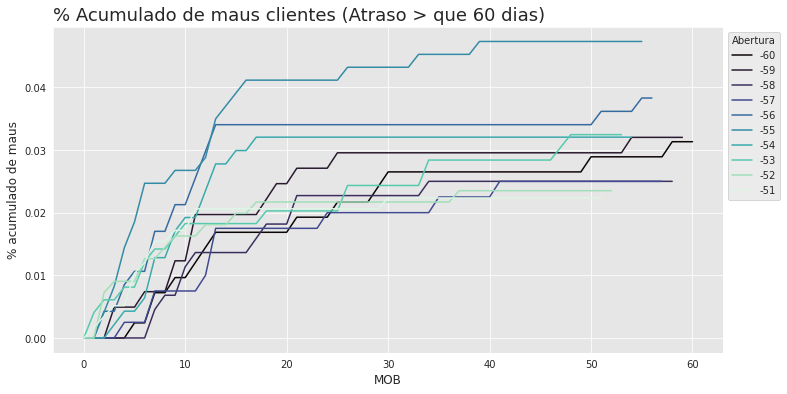

In [ ]:
sns.set_style("darkgrid",{"axes.facecolor": ".9"})                              #Configurar o tema do gráfico
df_vintage_pivot.T.iloc[:,:10].plot(legend = True,                              #Plotar o gráfico com legenda
                                    figsize=(12,6),                             #Configurar tamanho
                                    colormap='mako')                            #Paleta de cor

plt.xlabel('MOB',size=12)                                                       #Configurar rótulo do eixo x
plt.ylabel('% acumulado de maus',size=12)                                       #Configurar rótulo do eixo y
plt.legend(bbox_to_anchor=(1, 1), title='Abertura')                             #Configurar caixa de legenda
plt.title('% Acumulado de maus clientes (Atraso > que 60 dias)',                #Configurar título
          size=18,
          loc='left')
plt.show()  

Foi possível observar que entre todas as aberturas com atraso maior que 60 dias elas tiveram um comportamento semelhante. 

No qual a partir de um período de MOB a aprtir de 12 o % se mantêm. 

Plotarei o gráfico com todas as aberturas sem legenda, pois o foco será entender se em alguma abertura há a possibilidade de te rum comportamento diferente.

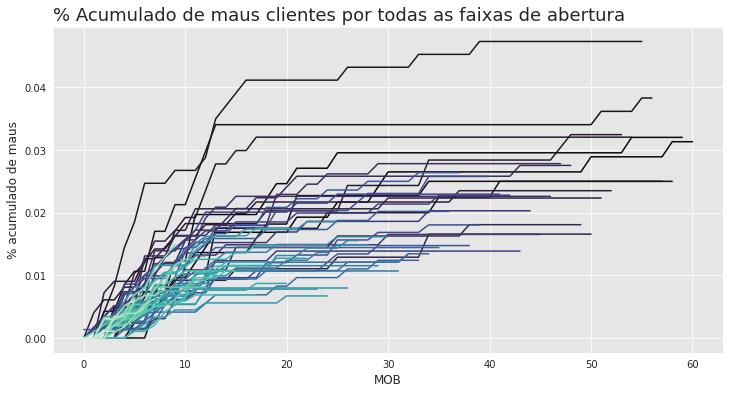

In [ ]:
sns.set_style("darkgrid",{"axes.facecolor": ".9"})                              #Configurar tema do gráfico
df_vintage_pivot.T.plot(legend=False,                                           #Plotar gráfico sem legenda
                        figsize=(12,6),                                         #Configurar tamanho do gráfico 
                        colormap='mako')                                        #Configurar paleta de cor

plt.xlabel('MOB',size=12)                                                       #Configurar rótulo do eixo x
plt.ylabel('% acumulado de maus',size=12)                                       #Configurar rótulo do eixo y
plt.title('% Acumulado de maus clientes por todas as faixas de abertura',       #Configurar título
          size=18,                                                              
          loc='left')                                                           
plt.show()

Pode-se observar que não e independente da abertura ele se manteve no % atingido no período.

PLotarei outro gráfico agora para mostrar o % de clientes, por janela.  

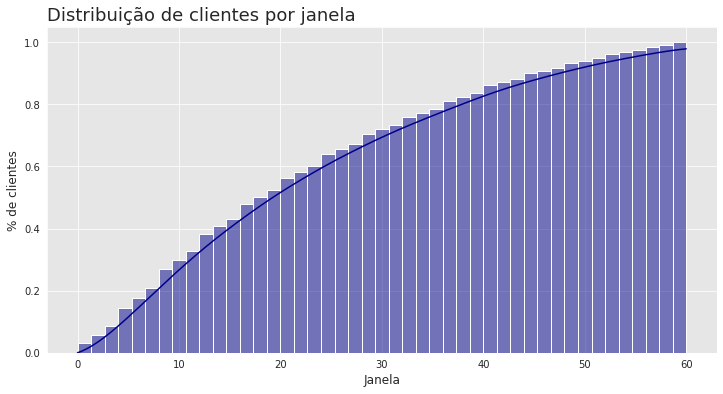

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_registros_creditos_ID, x='Janela',                         #Plotar gráfico
             cumulative=True,                                                   #Acionar gráfico acumulativo
             stat='density',                                                    #Padronizar para que a área total do gráfico seja igual a 1
             kde=True,                                                          #Mostrar a linha suavizada entre as faixas do histograma
             color='darkblue')                                                  #Modificar a cor


plt.xlabel('Janela',size=12)                                                    #Inserir o rótulo do eixo x
plt.ylabel('% de clientes',size=12)                                             #Inserir o rótulo do eixo y
plt.title('Distribuição de clientes por janela',fontsize=18,loc='left')         #Inserir o título do gráfico
plt.show()

Podemos observar que a mediana do percentual de clientes é em uma janela de 20.

Portanto utilizar clientes com uma faixa de 20 meses conseguirei tanto abarcar a faixa de 12 meses que já encontrei e mais uma quantidade que possa representar com maior relevância a base dados. 

Até agora eu analisei os clientes maus que atrasaram por mais que 60 dias.

Para entender se de fato esse caminho está correto, criarei um novo DataFrame que irá ter colunas preenchidas com 1 para todas as faixas de atraso. 

In [ ]:
dict_intervalo_atraso = {'maior_30_dias': 3,                                     #Dicionário com índice de faixa de atraso
                         'maior_60_dias': 4, 
                         'maior_90_dias': 5,
                         'maior_120_dias': 6, 
                         'maior_150_dias': 7}


for chave, valor in dict_intervalo_atraso.items():                                                                                  #For para prrencher com cada faixa de atraso
  df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) #Função anônima que irá aplicar para todas as faixas de atraso

df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


Criarei outro DataFrame com as taxas de mau pagador para cada faixa de atraso. 

In [ ]:
dict_taxa_mau = {}                                                                                                    #Dicionário vazio para armazenar os valores
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))                                                                #Quantidade total de IDs        

for chave in dict_intervalo_atraso.keys():                                                                            #For para cada chave dentro do dicionário
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()      #Definindo o valor mínimo para cada chave
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})                                             #Definindo o valor de MOB para cada faixa
  lista = []                                                                                                          #Lista vazia para armazenar os ID classificados como Mau 
  for i in range(0,61):                                                                                               #For com as possibilidades dos MOB
      lista_mau = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()                                               #Filtrar os ID com MOB = i
      lista.extend(lista_mau)                                                                                         #Acrescentar a lista_mau em lista  
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lista)) / id_sum                         #Calcular a quantidade de ID unicos com MOB = i e taxa mau e fazer o calculo da taxa
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']                                                                  #Acrescentar o valor da Taxa_Mau dentro da chave do dicionário

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.00,0.00,0.00,0.00,0.00
1,0.01,0.00,0.00,0.00,0.00
2,0.03,0.00,0.00,0.00,0.00
3,0.04,0.00,0.00,0.00,0.00
4,0.05,0.00,0.00,0.00,0.00
...,...,...,...,...,...
56,0.12,0.01,0.01,0.01,0.00
57,0.12,0.01,0.01,0.01,0.00
58,0.12,0.01,0.01,0.01,0.00
59,0.12,0.01,0.01,0.01,0.00


Criarei um gráfico para observar as novas taxas.

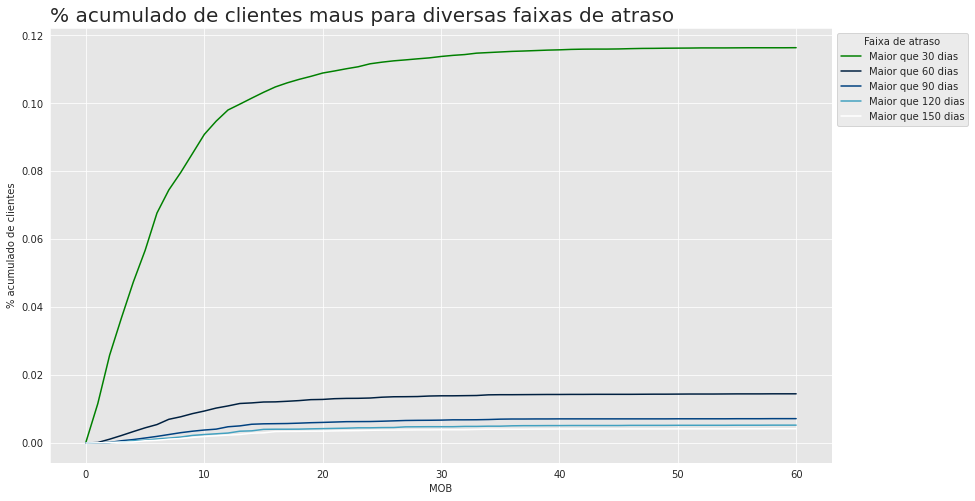

In [ ]:
df_taxa_mau.plot(grid = True, figsize=(14, 8),colormap='ocean')                 #Plotar gráfico com grid, tamanho e paleta de cor

plt.xlabel('MOB')                                                               #Configurar rótulo do eixo x
plt.ylabel('% acumulado de clientes')                                           #Configurar rótulo do eixo y
plt.legend(['Maior que 30 dias','Maior que 60 dias','Maior que 90 dias',        #Configurar valores da legenda
            'Maior que 120 dias','Maior que 150 dias'], 
           bbox_to_anchor=(1, 1),                                               #Configurar posicionamento da legenda
           title='Faixa de atraso')                                             #Configurar título da legenda
plt.title('% acumulado de clientes maus para diversas faixas de atraso',        #Configurar título do gráfico
          size=20,                                                              #Configurar tamanho do título do gráfico
          loc='left')                                                           #Configurar posição do título do gráfico
plt.show()

Dentro do período de 12 meses para as demais faixas também se estabiliza o percentual de clientes.

Também vemos que grande parte dos clientes atrasam conta até 30 dias. Por isso não irei considerar um mau pagador dentro dessa faixa, pois se não teremos uma medida muito severa.

#### <font color= MediumSpringGreen> 1.2.3 Definindo o target

Definido pela análise vintage que a janela ideal será maior que 12 meses, verificarei a quantidade total de clientes nesta configuração:

In [ ]:
len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)    #Quantidade de clientes com janela maior ou igual a 12


30918

Criarei uma cópia do DataFrame de clientes aprovados, apenas com os clientes da janela maior ou igual que 12.

In [ ]:
df_clientes_aprovados_maior_que_12 = df_clientes_aprovados.query('Janela >= 12').copy()   #Cópia do DataFrame com dos clientes aprovados com a janela maior que 12
df_clientes_aprovados_maior_que_12.shape

(943061, 14)

In [ ]:
df_clientes_aprovados_maior_que_12.Faixa_atraso.unique()

array(['pagamento realizado', '1-29 dias', 'nenhum empréstimo',
       '30-59 dias', '60-89 dias', '90-119 dias', '120-149 dias',
       '>150 dias'], dtype=object)

A quantidade é de 943061 mil linhas, devido a todo os histórico de cada cliente, repetindo o ID em várias linhas.

Criarei um DataFrame atribuindo 1 para cada cliente que tiver pagamento em atraso com 60 ou mais dias e 0 para os demais.

In [ ]:
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_maior_que_12.groupby('ID_Cliente').apply(f.verifica)).reset_index()   #Cria o DataFrame aplicando a função.
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']                                                                          #Renomeia as colunas
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


Com o DataFrame com o target encontrado, fitrarei dentro da tabela dos clientes cadastrados apenas estes que temos com a aprovação.

Devido a base de clientes cadastrados sem bem maior (clientes com cadastrados que não fizeram solicitação de crédito) apenas faz sentido treinar o modelo com valores que já tenho o histórico anterior.

In [ ]:
df_registros_creditos_id

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0
...,...,...
30913,5150481,0
30914,5150482,0
30915,5150483,0
30916,5150484,0


In [ ]:
df_registro_clientes_targets = df_clientes_cadastrados_ID_unicos.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008804,1,1,0,427500.00,Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,0,0,Outros,2.00,12.40,0
1,5008805,1,1,0,427500.00,Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,0,0,Outros,2.00,12.40,0
2,5008806,1,1,0,112500.00,Empregado,Ensino medio,Casado,Casa propria,59.00,0,0,0,Seguranca,2.00,3.10,0
3,5008810,0,1,0,270000.00,Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,0,1,1,Venda,1.00,8.40,0
4,5008811,0,1,0,270000.00,Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,0,1,1,Venda,1.00,8.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,5149729,1,1,0,90000.00,Empregado,Ensino medio,Casado,Casa propria,52.00,0,0,0,Outros,2.00,4.70,1
23415,5149775,1,1,0,130500.00,Empregado,Ensino medio,Casado,Casa propria,44.00,0,1,0,Construcao Civil,2.00,25.70,1
23416,5149834,0,1,0,157500.00,Associado comercial,Ensino superior,Casado,Casa propria,34.00,0,1,1,Medicina,2.00,3.60,1
23417,5149838,0,1,0,157500.00,Pensionista,Ensino superior,Casado,Casa propria,34.00,0,1,1,Medicina,2.00,3.60,1


Reorganizarei o conjunto de dados de acordo com o tipo de variaveis do DataFrame.

In [ ]:
colunas_categoricas_binarias = ['Tem_Carro',
                                'Tem_Casa_Propria',
                                'Tem_telefone_trabalho',
                                'Tem_telefone_fixo',
                                'Tem_email']
colunas_categoricas_nao_binarias = ['Categoria_de_renda',
                                    'Grau_Escolaridade',
                                    'Estado_Civil',
                                    'Moradia',
                                    'Ocupacao']

df_registro_clientes_targets = df_registro_clientes_targets[['ID_Cliente'] + colunas_quantitativas + colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]
df_registro_clientes_targets.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008804,33.00,0,427500.00,12.40,2.00,1,1,1,0,0,Empregado,Ensino superior,Uniao estavel,Alugado,Outros,0
1,5008805,33.00,0,427500.00,12.40,2.00,1,1,1,0,0,Empregado,Ensino superior,Uniao estavel,Alugado,Outros,0
2,5008806,59.00,0,112500.00,3.10,2.00,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
3,5008810,52.00,0,270000.00,8.40,1.00,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
4,5008811,52.00,0,270000.00,8.40,1.00,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0


## <font color= MediumSpringGreen> 2. Análise exploratória


Farei a exploração dos dados para entender melhor como estão para posteriormente desenvolver o modelo.

In [ ]:
df_registro_clientes_targets

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008804,33.00,0,427500.00,12.40,2.00,1,1,1,0,0,Empregado,Ensino superior,Uniao estavel,Alugado,Outros,0
1,5008805,33.00,0,427500.00,12.40,2.00,1,1,1,0,0,Empregado,Ensino superior,Uniao estavel,Alugado,Outros,0
2,5008806,59.00,0,112500.00,3.10,2.00,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
3,5008810,52.00,0,270000.00,8.40,1.00,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
4,5008811,52.00,0,270000.00,8.40,1.00,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,5149729,52.00,0,90000.00,4.70,2.00,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Outros,1
23415,5149775,44.00,0,130500.00,25.70,2.00,1,1,0,1,0,Empregado,Ensino medio,Casado,Casa propria,Construcao Civil,1
23416,5149834,34.00,0,157500.00,3.60,2.00,0,1,0,1,1,Associado comercial,Ensino superior,Casado,Casa propria,Medicina,1
23417,5149838,34.00,0,157500.00,3.60,2.00,0,1,0,1,1,Pensionista,Ensino superior,Casado,Casa propria,Medicina,1


A primeira métrica que quero procurar é a quantidade de maus clientes, nossa coluna de target.

In [ ]:
df_registro_clientes_targets.Mau.value_counts(normalize=True)*100

0   97.71
1    2.29
Name: Mau, dtype: float64

Apenas 2,28% dos clientes são maus, o que para nosso modelo é ruim, pois são dados extremamente desbalanceados. 

Posteriormente irei realizar o balanceamento, mas agora procurarei entender como se dão cada variável peleos maus e bons clientes.

### <font color= MediumSpringGreen> 2.1 Análise das variáveis


#### <font color= MediumSpringGreen> 2.1.1 Idade dos clientes


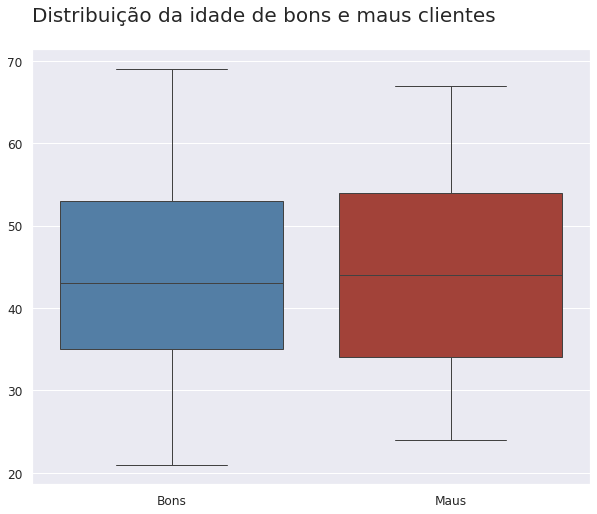

In [ ]:
f.boxplot_bons_maus(df_registro_clientes_targets, 'Idade','Distribuição da idade de bons e maus clientes')

É possível observar grandese semelhanças entre a distruibuição da idade dos bons e maus clientes. 

Apenas que dentre os maus, não está tão distribuído com idade em torno de 21,22 anos e após 68 anos.

#### <font color= MediumSpringGreen> 2.1.2 Quantidade de filhos dos clientes


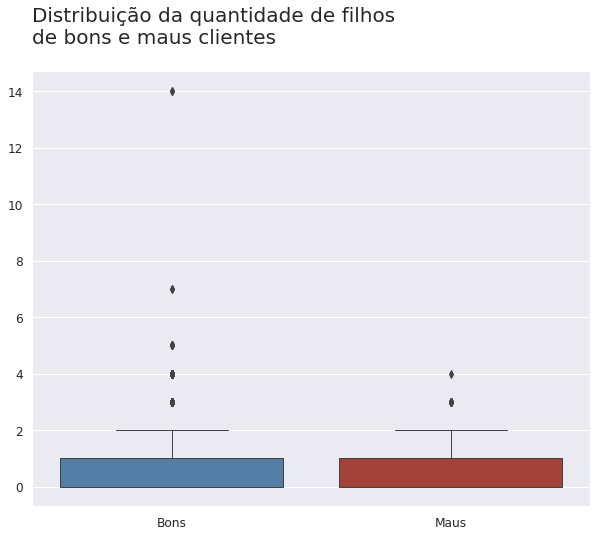

In [ ]:
f.boxplot_bons_maus(df_registro_clientes_targets, 'Qtd_Filhos','Distribuição da quantidade de filhos' +'\n' + 'de bons e maus clientes')


Os valores máximos da distribuição de filhos é da quantidade de 2.


Entretanto há diversos outliers principalmente entre os bons clientes.

#### <font color= MediumSpringGreen> 2.1.3 Rendimento anual dos clientes


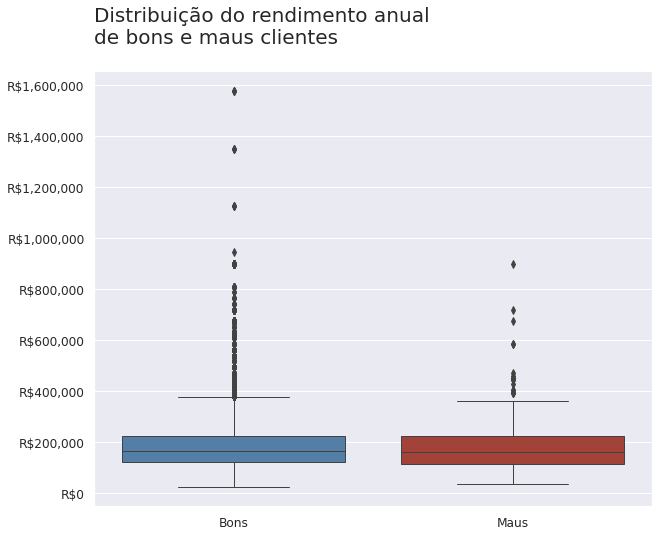

In [ ]:
f.boxplot_bons_maus(df_registro_clientes_targets,'Rendimento_Anual','Distribuição do rendimento anual' +'\n' + 'de bons e maus clientes')


Nesta variável também se teve uma semelhança para os dois tipos de clientes.

#### <font color= MediumSpringGreen> 2.1.4 Anos de trabalho dos clientes


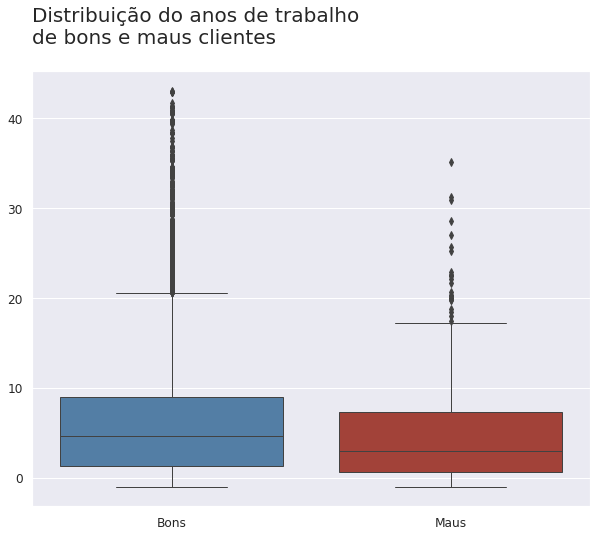

In [ ]:
f.boxplot_bons_maus(df_registro_clientes_targets, 'Anos_empregado','Distribuição do anos de trabalho' +'\n' + 'de bons e maus clientes')


Até 75% dos clientes bons e maus tem menos de 10 anos de trabalho, chegando a valores máximos de aproxidamente 18-20 anos.

Mas com diversos outliers dentre os clientes bons e maus.

#### <font color= MediumSpringGreen> 2.1.5 Tamanho da família dos clientes


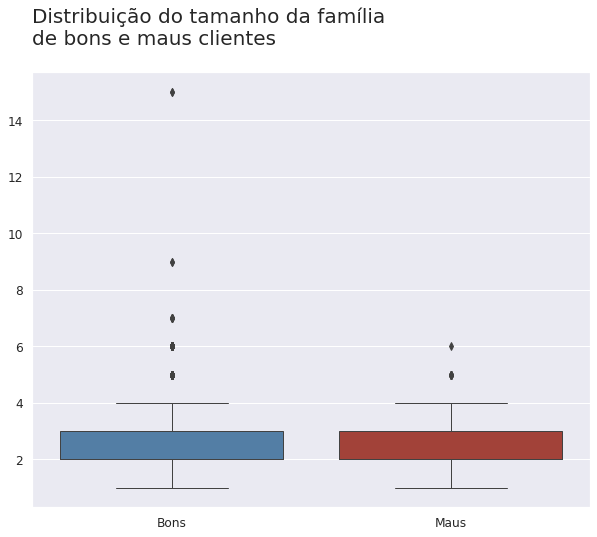

In [ ]:
f.boxplot_bons_maus(df_registro_clientes_targets, 'Tamanho_Familia','Distribuição do tamanho da família' +'\n' + 'de bons e maus clientes')


Assim como na quantidade de filhos, há uma maior quantidade de outliers em clientes bons do que maus.

Devido a serem variáveis dependentes, o padrão da distribuição também se assemelha. 


#### <font color= MediumSpringGreen> 2.1.6 Propriedade de carro dos clientes


Devido ao seu desbalanceamento, entenderei esta e as próximas variáveis, divididindo o conjunto de dados em bons e maus clientes.



In [ ]:
bons_clientes = df_registro_clientes_targets.query('Mau == 0')
maus_clientes = df_registro_clientes_targets.query('Mau == 1')

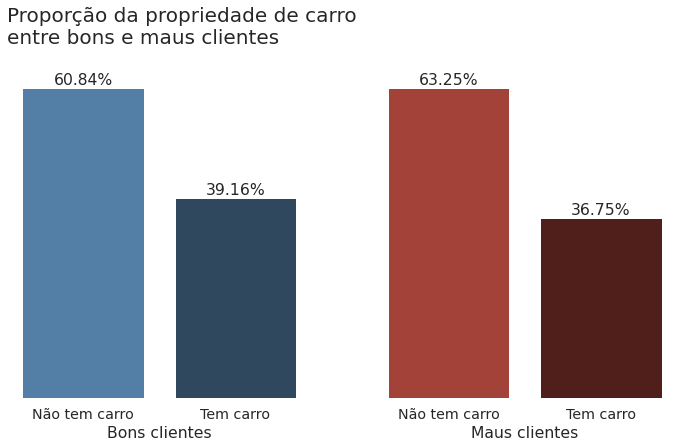

In [ ]:
f.grafico_barras_vertical_bons_maus(bons_clientes,maus_clientes,'Tem_Carro','Proporção da propriedade de carro'+'\n'+'entre bons e maus clientes','Tem carro','Não tem carro')

Posso observar que a proporção entre ter ou não ter carro nas duas classificações dos clientes são bastante semelhantes.

#### <font color= MediumSpringGreen> 2.1.7 Propriedade de casa própria


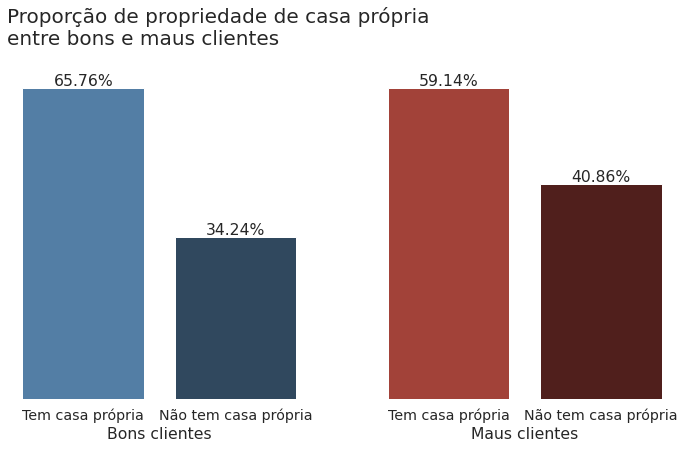

In [ ]:
f.grafico_barras_vertical_bons_maus(bons_clientes,maus_clientes,'Tem_Casa_Propria','Proporção de propriedade de casa própria'+'\n'+'entre bons e maus clientes','Tem casa própria','Não tem casa própria')

Teve uma pequena diferençar entre os bons e maus clientes, entretanto se manteve a proporção entre os dois.

#### <font color= MediumSpringGreen> 2.1.8 Propriedade de casa própria


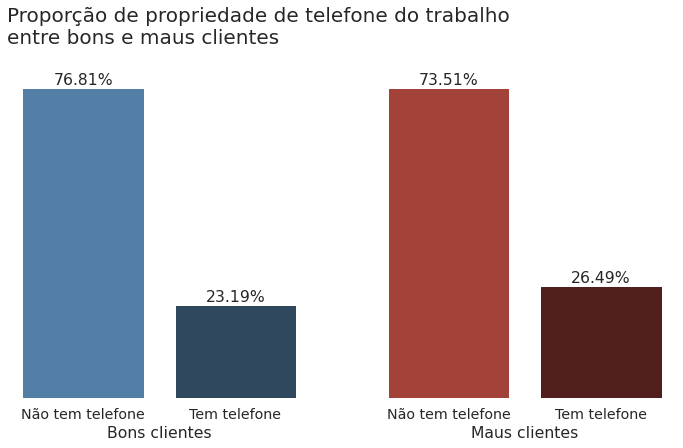

In [ ]:
f.grafico_barras_vertical_bons_maus(bons_clientes,maus_clientes,'Tem_telefone_trabalho','Proporção de propriedade de telefone do trabalho' +'\n'+ 'entre bons e maus clientes','Tem telefone','Não tem telefone')

Mais uma variável que se encontrou muito próxima entre os dois tipos de clientes.

#### <font color= MediumSpringGreen> 2.1.9 Propriedade de telefone fixo


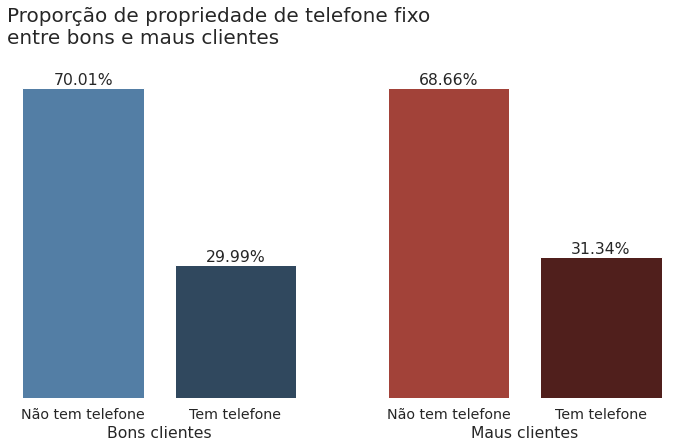

In [ ]:
f.grafico_barras_vertical_bons_maus(bons_clientes,maus_clientes,'Tem_telefone_fixo','Proporção de propriedade de telefone fixo' +'\n'+ 'entre bons e maus clientes','Tem telefone','Não tem telefone')

Ter ou não ter telefone fixo também manteve a proporção entre os dois tipos de clientes.

#### <font color= MediumSpringGreen> 2.1.10 Propriedade de e-mail


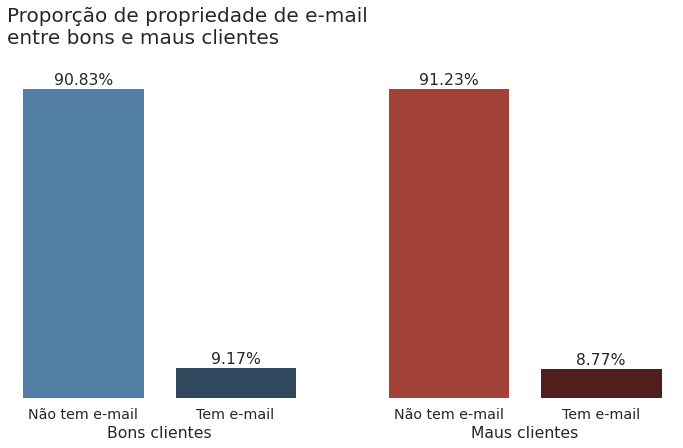

In [ ]:
f.grafico_barras_vertical_bons_maus(bons_clientes,maus_clientes,'Tem_email','Proporção de propriedade de e-mail' +'\n'+ 'entre bons e maus clientes','Tem e-mail','Não tem e-mail')

Esta variável também se manteve igual as proporções.

Entretanto me chamou atenção que a maior parte dos clientes não tem e-mail.

Acredito que isso seja um erro da base de dados que possa ter trocado os valores de 0 e 1 nesta variável.

#### <font color= MediumSpringGreen> 2.1.11 Categoria da renda


A única diferença do ranking entre os bons e maus clientes, foi a inexistência de estudantes como maus clientes e um quase inexistente número de estudante como bons clientes.

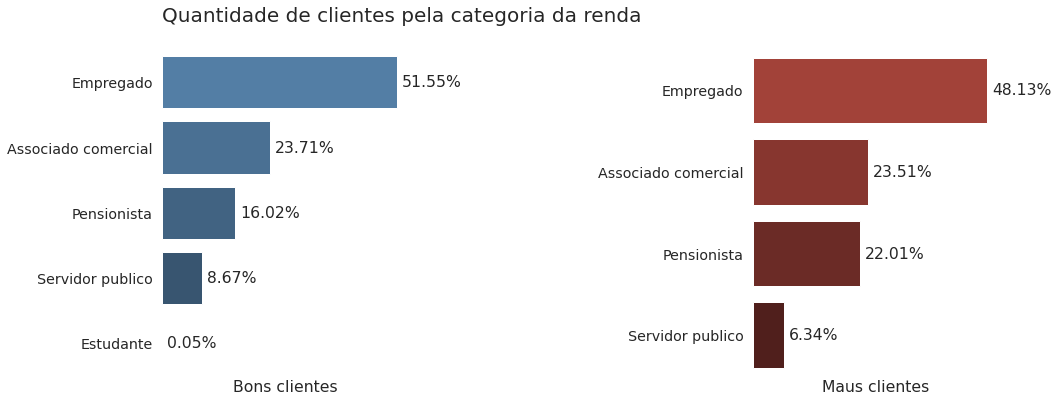

In [ ]:
f.grafico_barras_horizontal_bons_maus(bons_clientes,maus_clientes,'Categoria_de_renda','Quantidade de clientes pela categoria da renda')

A categoria da renda esta permanecento com valores próximos em relação aos dois tipos de clientes.

#### <font color= MediumSpringGreen> 2.1.12 Grau de escolaridade




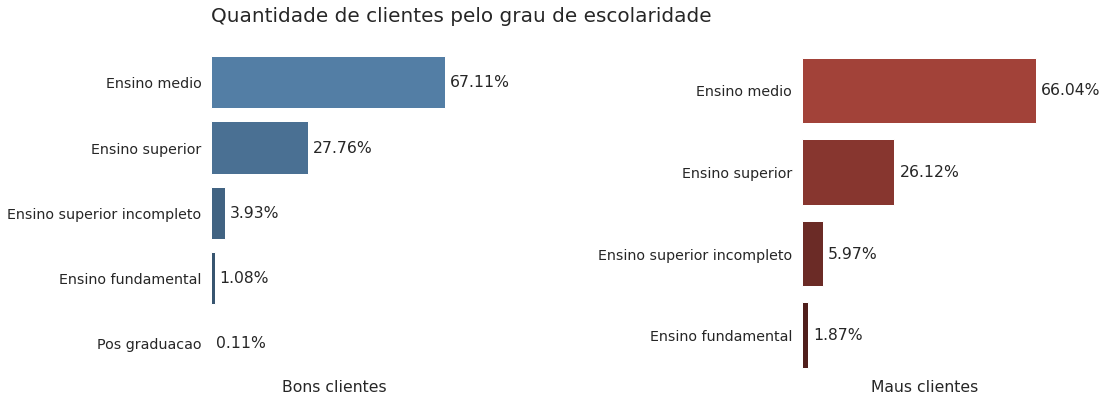

In [ ]:
f.grafico_barras_horizontal_bons_maus(bons_clientes,maus_clientes,'Grau_Escolaridade','Quantidade de clientes pelo grau de escolaridade')

Com algumas poucas diferenças entre os dois tipos, mas não tão consideravel para se trazer como ponto decisivo ao modelo.

#### <font color= MediumSpringGreen> 2.1.13 Estado civil


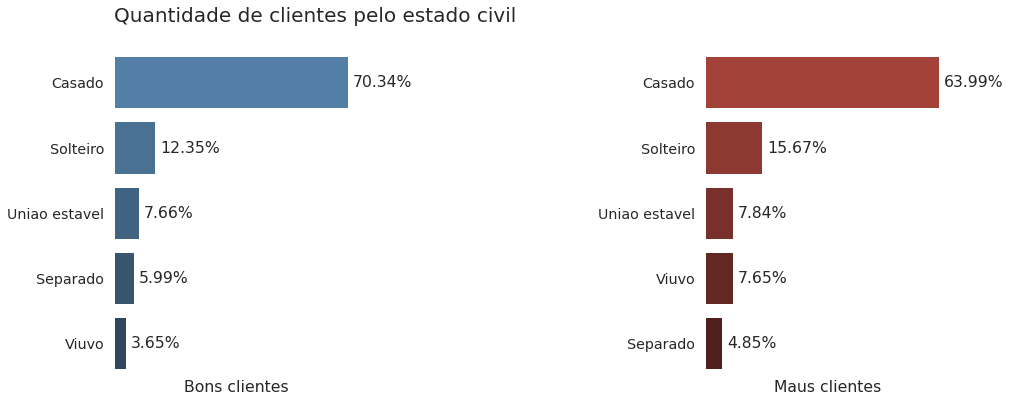

In [ ]:
f.grafico_barras_horizontal_bons_maus(bons_clientes,maus_clientes,'Estado_Civil','Quantidade de clientes pelo estado civil')

No estado civil, o ranking modificou um pouco a ordem entre os tipos.

Entre os os bons clientes há proporcionalmente um pouco mais de casados.

#### <font color= MediumSpringGreen> 2.1.14 Tipo de moradia


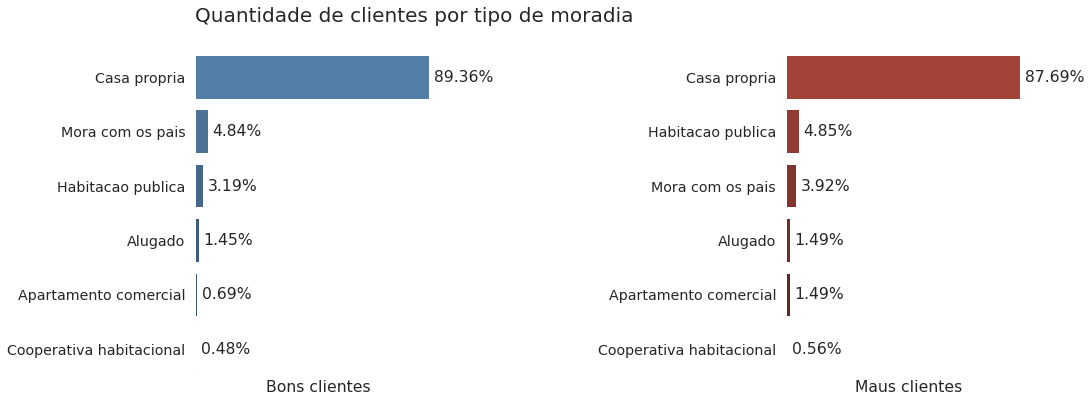

In [ ]:
f.grafico_barras_horizontal_bons_maus(bons_clientes,maus_clientes,'Moradia','Quantidade de clientes por tipo de moradia')

Poucas diferenças novamente entre os tipos, modificando apenas alguns itens de ordem.

#### <font color= MediumSpringGreen> 2.1.15 Tipo de ocupação


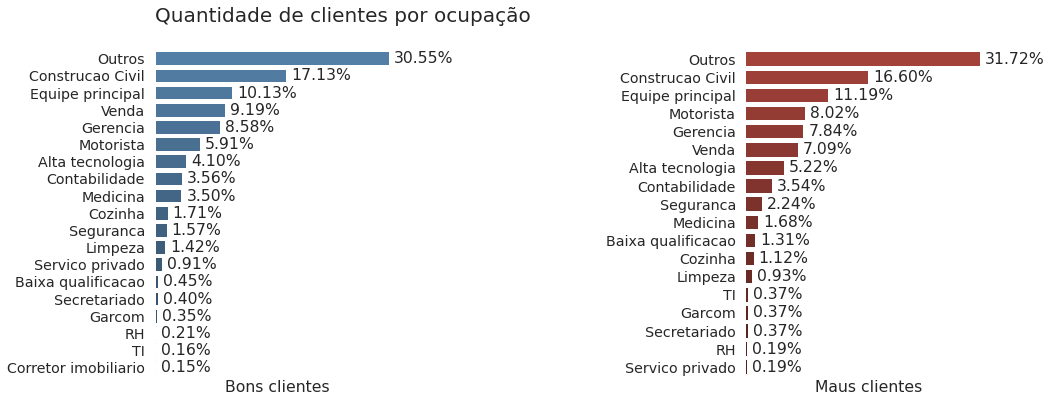

In [ ]:
f.grafico_barras_horizontal_bons_maus(bons_clientes,maus_clientes,'Ocupacao','Quantidade de clientes por ocupação')

Com mais algumas pequenas diferenças, entretanto na visão geral os dois tipos estao semelhantes.

## <font color= MediumSpringGreen> 3. Tratamento de outliers


Como visto na exploração inicial e na visualização dos dados, há diversos outliers dentro das colunas:

* 'Qtd_Filhos'
* Rendimento_Anual'
* 'Tamanho_Familia'
* 'Anos_empregado'

Como podem ser vistas no conjunto de dados abaixo:

In [ ]:
df_registro_clientes_targets[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,23419.00,23419.00,23419.00,23419.00,23419.00
mean,44.01,0.43,189373.12,6.18,2.21
std,11.28,0.74,102602.18,6.79,0.90
min,21.00,0.00,27000.00,-1.00,1.00
25%,35.00,0.00,121500.00,1.20,2.00
50%,43.00,0.00,165600.00,4.60,2.00
75%,53.00,1.00,225000.00,9.00,3.00
max,69.00,14.00,1575000.00,43.00,15.00


Para tratar estes outliers, calcularei o valor do limite superior da distribuição através do limite máximo de 90% da distribuição e substituirei eles por estes.

Farei uma cópia do conjunto de dados, para que permaneça com o conjunto anterior integro e verifique como os dois poderão se dar no treinamento do modelo.


In [ ]:
df_registro_clientes_targets_sem_outliers = df_registro_clientes_targets.copy()

In [ ]:
df_registro_clientes_targets_sem_outliers = f.transforma_outliers(df_registro_clientes_targets_sem_outliers)


In [ ]:
df_registro_clientes_targets_sem_outliers[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,23419.00,23419.00,23419.00,23419.00,23419.00
mean,44.01,0.41,179716.91,5.53,2.19
std,11.28,0.67,73597.94,5.13,0.85
min,21.00,0.00,27000.00,-1.00,1.00
25%,35.00,0.00,121500.00,1.20,2.00
50%,43.00,0.00,165600.00,4.60,2.00
75%,53.00,1.00,225000.00,9.00,3.00
max,69.00,2.00,315000.00,15.00,4.00


Após a modificação, posso ainda fazer os testes com os boxplots para visualizar a inexistência dos outliers.

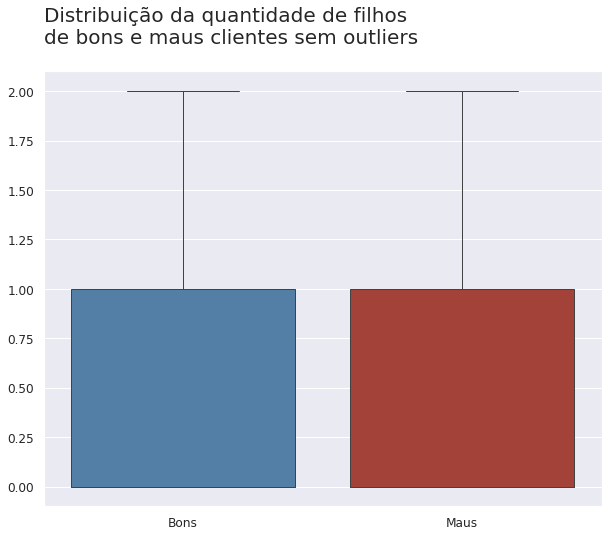

In [ ]:
f.boxplot_bons_maus(df_registro_clientes_targets_sem_outliers, 'Qtd_Filhos','Distribuição da quantidade de filhos' +'\n' + 'de bons e maus clientes sem outliers')


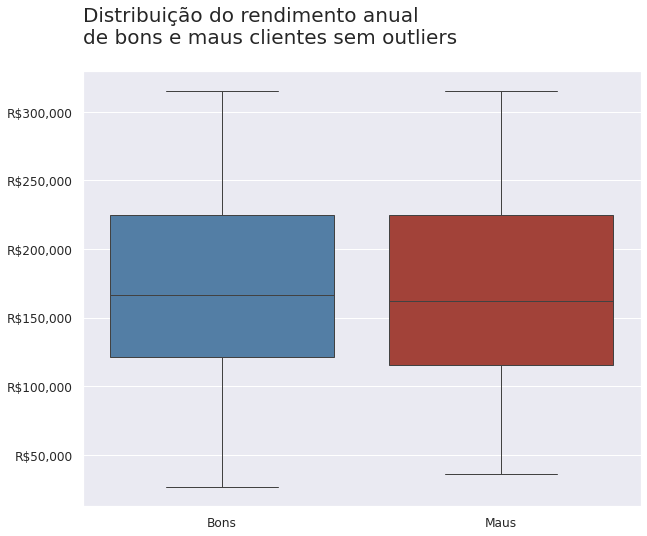

In [ ]:
f.boxplot_bons_maus(df_registro_clientes_targets_sem_outliers,'Rendimento_Anual','Distribuição do rendimento anual' +'\n' + 'de bons e maus clientes sem outliers')


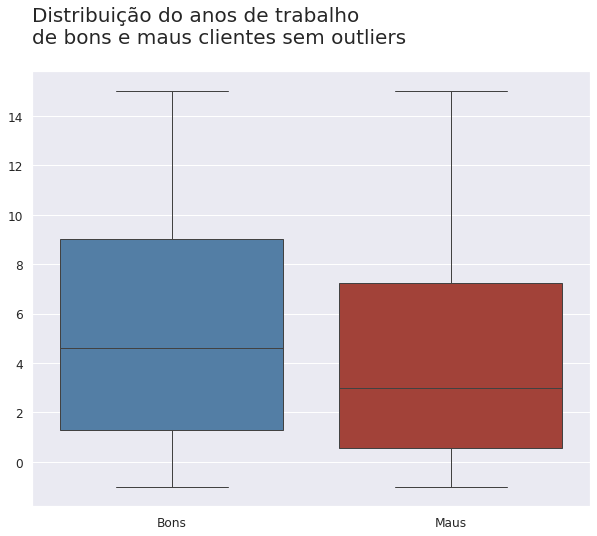

In [ ]:
f.boxplot_bons_maus(df_registro_clientes_targets_sem_outliers, 'Anos_empregado','Distribuição do anos de trabalho' +'\n' + 'de bons e maus clientes sem outliers')

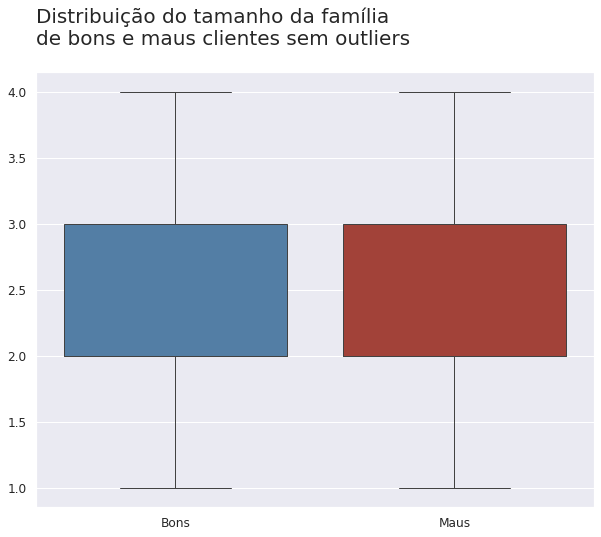

In [ ]:
f.boxplot_bons_maus(df_registro_clientes_targets_sem_outliers, 'Tamanho_Familia','Distribuição do tamanho da família' +'\n' + 'de bons e maus clientes sem outliers')

## <font color= MediumSpringGreen> 4. Exportação dos dados

Exportarei os dados em formato .csv para serem utilizados no outro notebook.

Eles estarão na pasta Datasets no [repositório deste projeto](https://github.com/FranciscoFoz/Bootcamp-Alura-Data-Science-Aplicado-a-Financas).





In [ ]:
df_registro_clientes_targets.to_csv('df_registro_clientes_targets.csv',index=False)
df_registro_clientes_targets_sem_outliers.to_csv('df_registro_clientes_targets_sem_outliers.csv',index=False)